# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [ ]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

In [6]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listN


Loading 13 neurons with 249 synapses and 49 gap junctions
Neurons in network: 
0 : FS_0  (x: 0.004763, y: 0.003989, z: 0.007753)
1 : dSPN_3  (x: 0.004763, y: 0.004004, z: 0.007750)
2 : FS_1  (x: 0.004769, y: 0.003991, z: 0.007769)
3 : iSPN_1  (x: 0.004782, y: 0.003994, z: 0.007746)
4 : iSPN_2  (x: 0.004780, y: 0.003978, z: 0.007760)
5 : LTS_0  (x: 0.004758, y: 0.003980, z: 0.007772)
6 : FS_3  (x: 0.004746, y: 0.003995, z: 0.007776)
7 : dSPN_2  (x: 0.004753, y: 0.004009, z: 0.007779)
8 : FS_2  (x: 0.004762, y: 0.004025, z: 0.007746)
9 : dSPN_0  (x: 0.004789, y: 0.003980, z: 0.007780)
10 : iSPN_3  (x: 0.004769, y: 0.004020, z: 0.007776)
11 : iSPN_0  (x: 0.004792, y: 0.004015, z: 0.007764)
12 : dSPN_1  (x: 0.004752, y: 0.004028, z: 0.007780)


In [7]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPost 3


Loading 13 neurons with 249 synapses and 49 gap junctions
List neurons post-synaptic to neuronID = 3 (iSPN_1)
1 : dSPN_3 (2 synapses)
7 : dSPN_2 (3 synapses)
9 : dSPN_0 (3 synapses)
11 : iSPN_0 (3 synapses)
12 : dSPN_1 (3 synapses)


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-7.json](../../snudda/data/experiment_config/experiment-config-7.json) file.

In [2]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "pair_recording", "experiment-config-7.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

Loading 13 neurons with 249 synapses and 49 gap junctions
Found 0 local gap junctions on node.
Setting tmGabaA reversal potential to -65.0 mV


In [3]:
pr.run()

Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 2.5 s, estimated time left: 252.0 s
41% done. Elapsed: 102.8 s, estimated time left: 148.0 s
80% done. Elapsed: 203.2 s, estimated time left: 50.8 s
Neuron simulation finished
Simulation run time: 254.7 s
Writing network output to networks/pair_recording_simulation/simulation/network-output-7.hdf5


## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Plotting traces: [1, 11, 12, 3, 7, 9]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


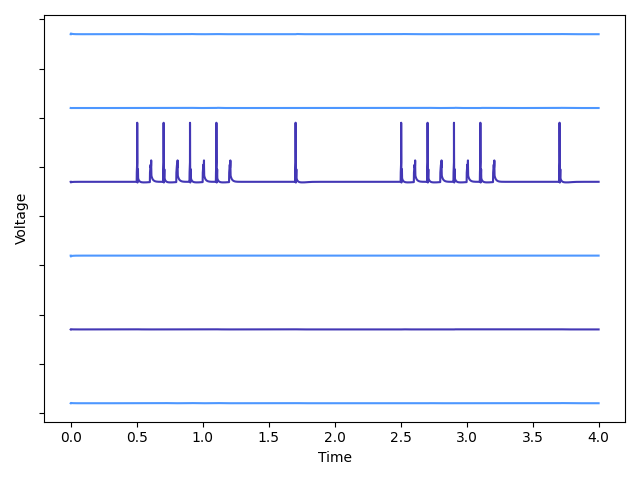

Saving to figure Network-voltage-trace-7-iSPN-dSPN-colour.pdf


In [4]:
%matplotlib notebook
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


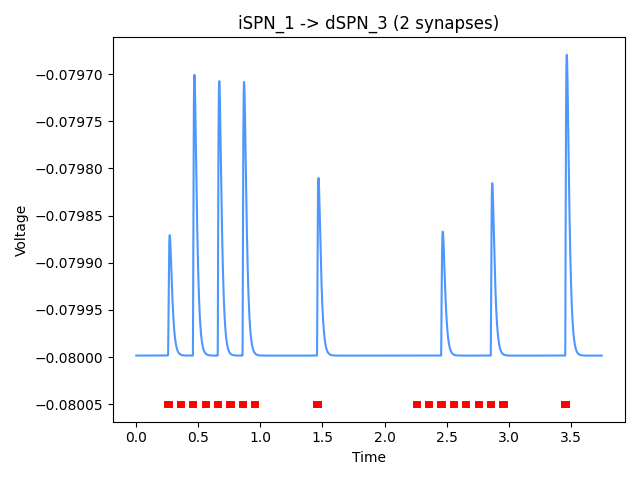

Saving to figure Current-injection-pre-3-post-1.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


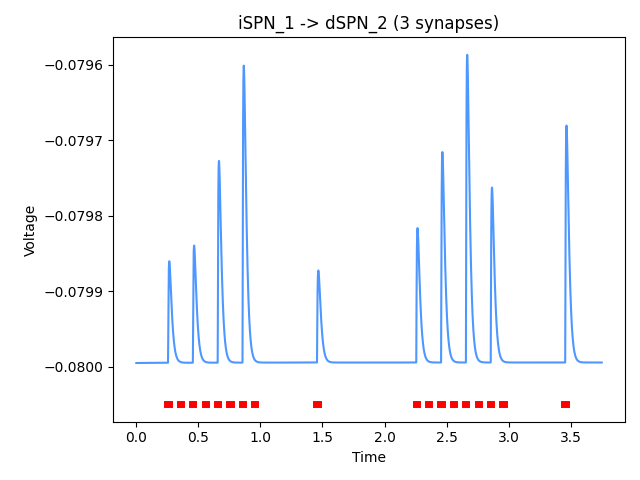

Saving to figure Current-injection-pre-3-post-7.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


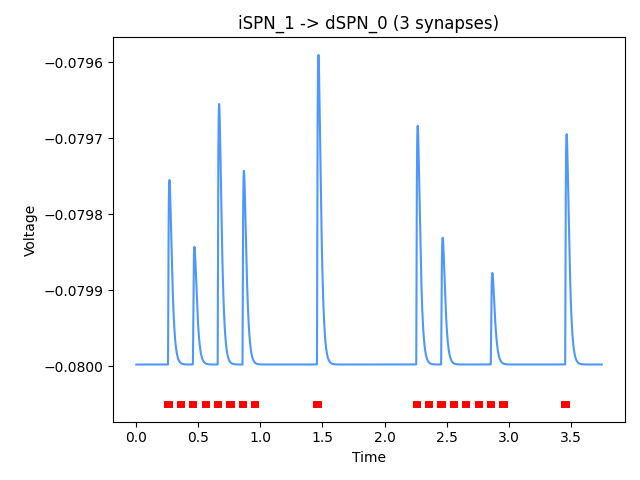

Saving to figure Current-injection-pre-3-post-9.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


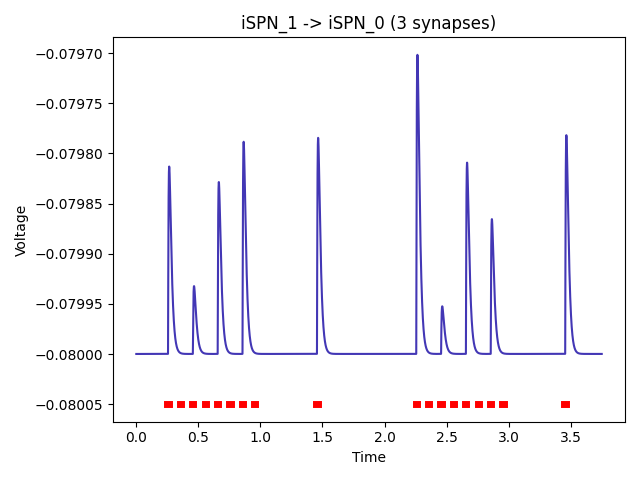

Saving to figure Current-injection-pre-3-post-11.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


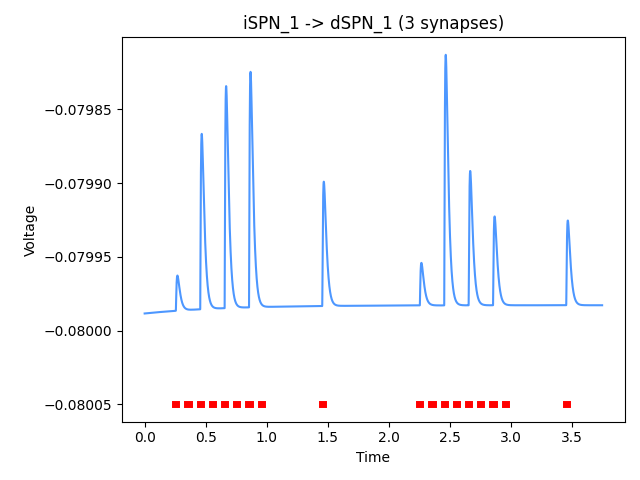

Saving to figure Current-injection-pre-3-post-12.pdf


In [5]:
%matplotlib notebook
pr.plot_traces()

The code below shows how you can use PlotTraces to load the voltage traces and plot the data yourself if you do not have the PairRecording object available anymore.

In [8]:
%matplotlib notebook
from snudda.plotting import PlotTraces
pt = PlotTraces(output_file=os.path.join(network_path,"simulation","network-output-7.hdf5"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 249 synapses and 49 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


Plotting traces: [1, 11, 12, 3, 7, 9]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


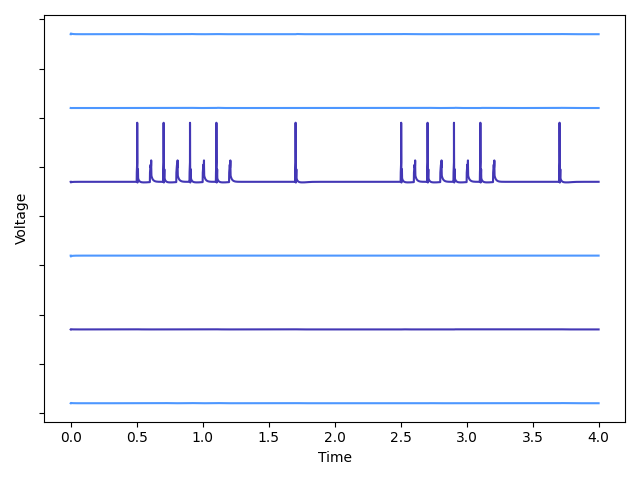

Saving to figure Network-voltage-trace-7-iSPN-dSPN-colour.pdf


<IPython.core.display.Javascript object>


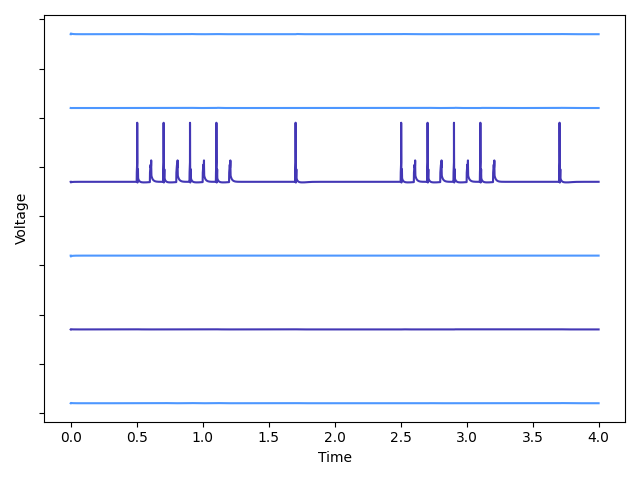

In [9]:
pt.plot_traces([x for x in pt.voltage])

Plotting traces: [3]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


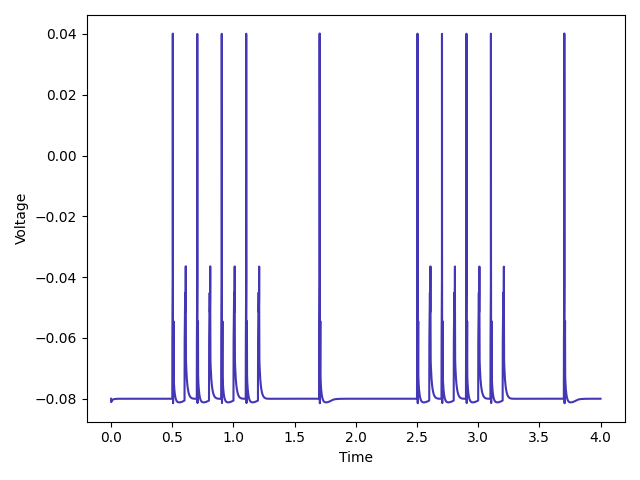

Saving to figure Network-voltage-trace-7-iSPN-colour.pdf


<IPython.core.display.Javascript object>


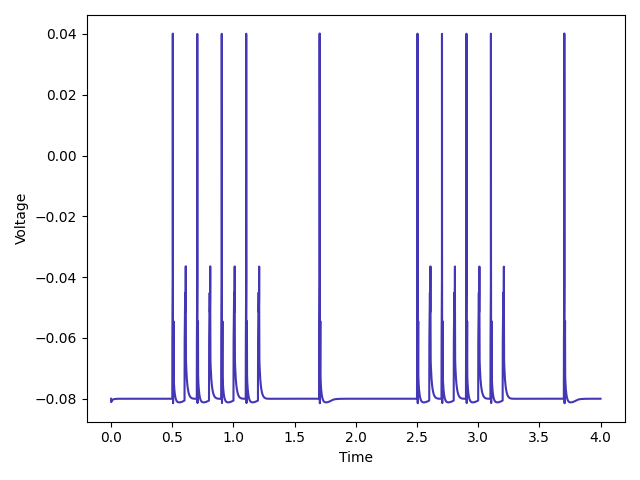

In [10]:
pt.plot_traces([3], offset=0)

Plotting traces: [12]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


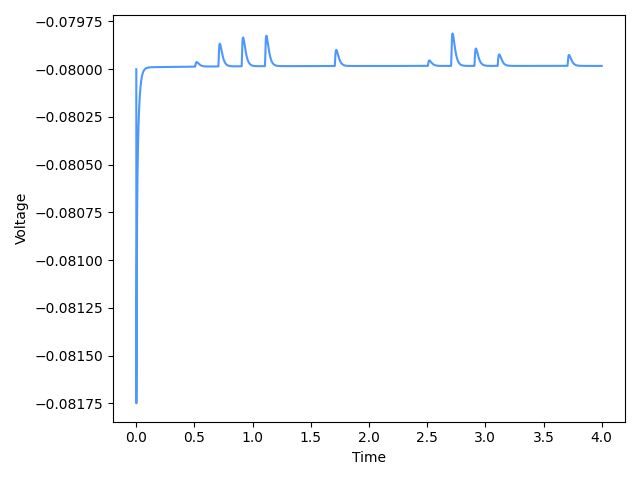

Saving to figure Network-voltage-trace-7-dSPN-colour.pdf


<IPython.core.display.Javascript object>


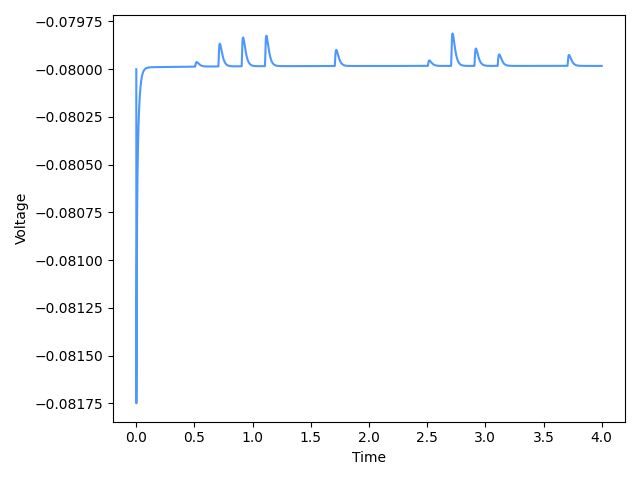

In [11]:
pt.plot_traces([12], offset=0)

Plotting traces: [1, 11, 12, 3, 7, 9]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


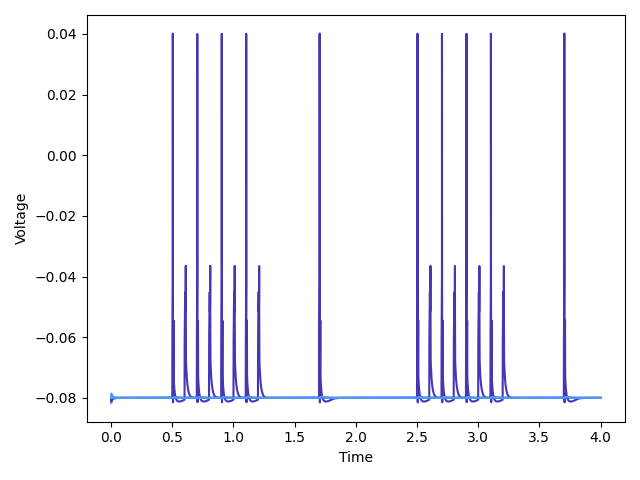

Saving to figure Network-voltage-trace-7-iSPN-dSPN-colour.pdf


<IPython.core.display.Javascript object>


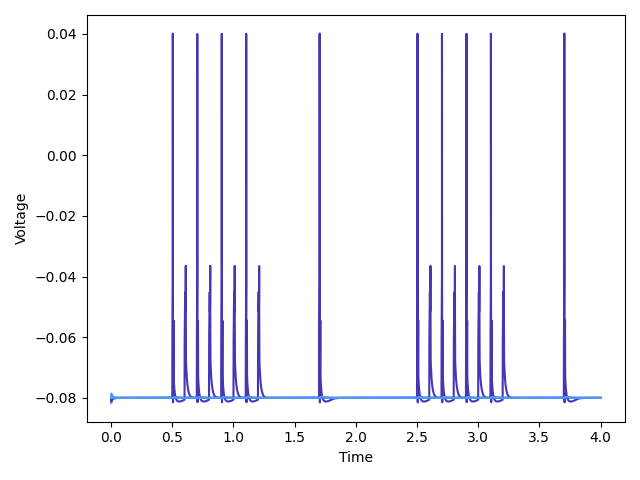

In [12]:
pt.plot_traces([x for x in pt.voltage], offset=0)

<IPython.core.display.Javascript object>


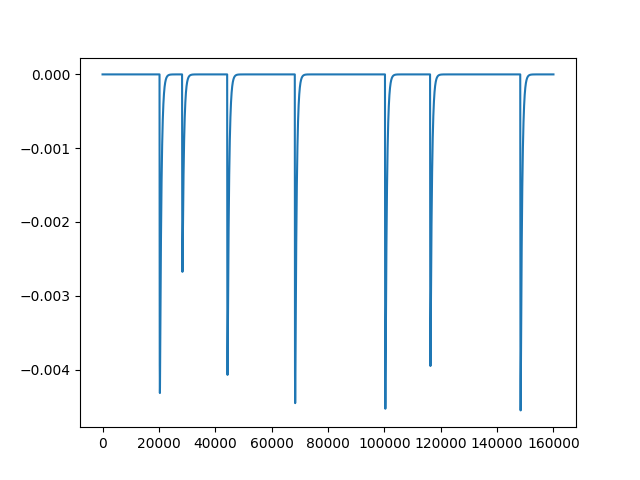

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([x for x in pr.synapse_currents[0][2]])
plt.show()

In [14]:
pr.synapse_currents[0][2]

Vector[21442]

In [16]:
pr.neurons[1].name

'dSPN_3'

##### 